# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [11]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

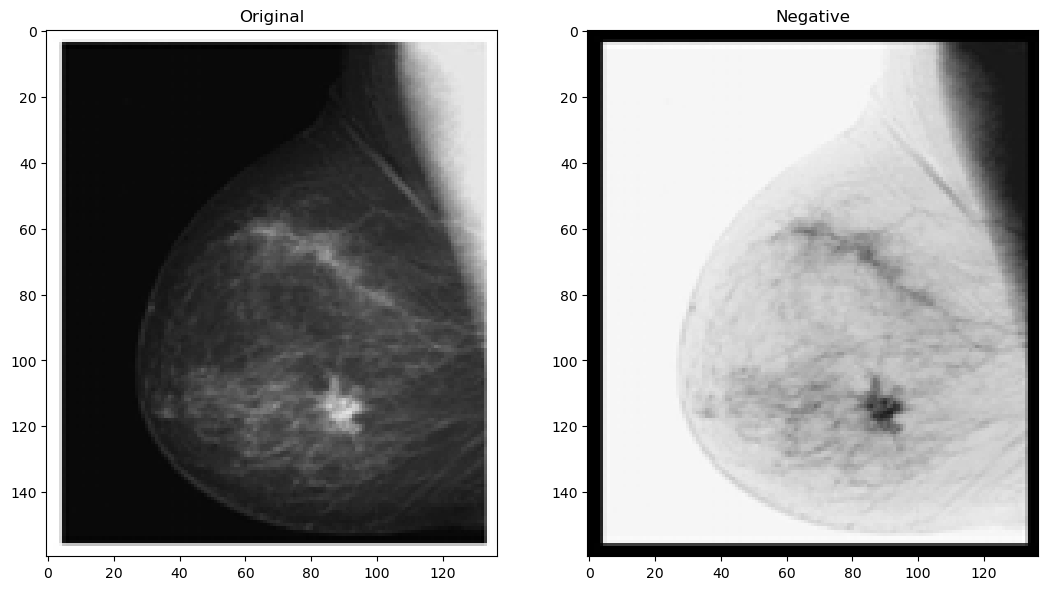

In [13]:
'''
1
Negative Transformation
'''
def Negative(img):
    negImg = 255 - img;
    show_images([img, negImg], ['Original', 'Negative'])

image = io.imread('imgs/Picture1.png')
gray_image = rgb2gray(image[:,:,:3])
Negative(gray_image)

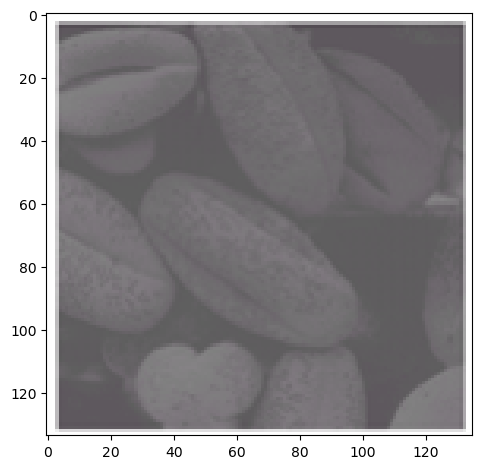

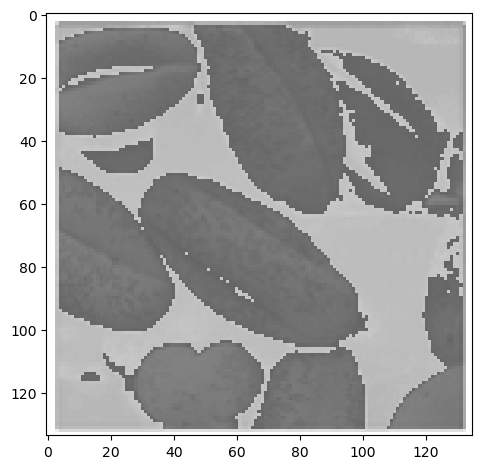

In [14]:
'''
2
Contrast Enhancement
'''
def Contrast_enhancement(image):
    uint8Img = np.uint8(rgb2gray(image[:,:,:3])*255)
    uint8Img2 = np.uint8(rgb2gray(image[:,:,:3])*255)
    
    uint8Img2[((uint8Img2 >= 0) * (uint8Img2 <= 100))] = uint8Img2[((uint8Img2 >= 0) * (uint8Img2 <= 100))]*1.5 + 50

    io.imshow(image)
    io.show()
    io.imshow(uint8Img2)
    io.show()

image = io.imread('imgs/Picture2.png')
Contrast_enhancement(image)

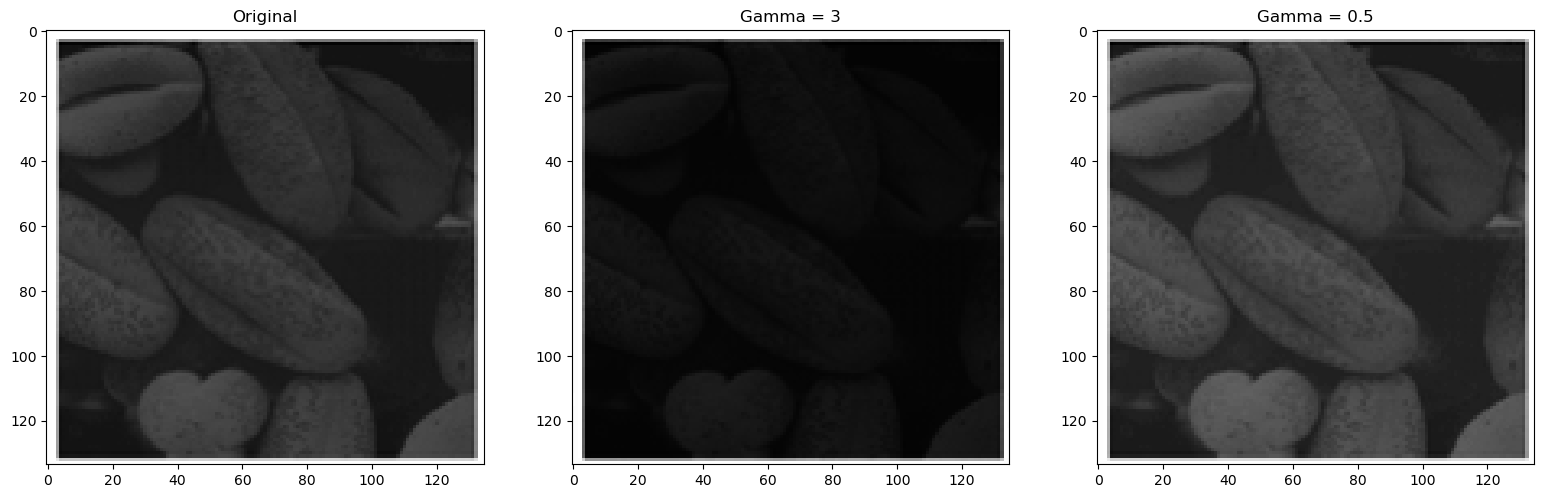

In [18]:
'''
3
Gamma Correction
'''
def Gamma_Correction(img, c, gamma1, gamma2):
    edited_img_3 = c * (img**gamma1)
    edited_img_05 = c * (img**gamma2)
    show_images([image, edited_img_3, edited_img_05], ['Original', 'Gamma = 3', 'Gamma = 0.5'])

image = rgb2gray(io.imread('imgs/Picture2.png')[:,:,:3])

Gamma_Correction(image, 1, 3, 0.5)

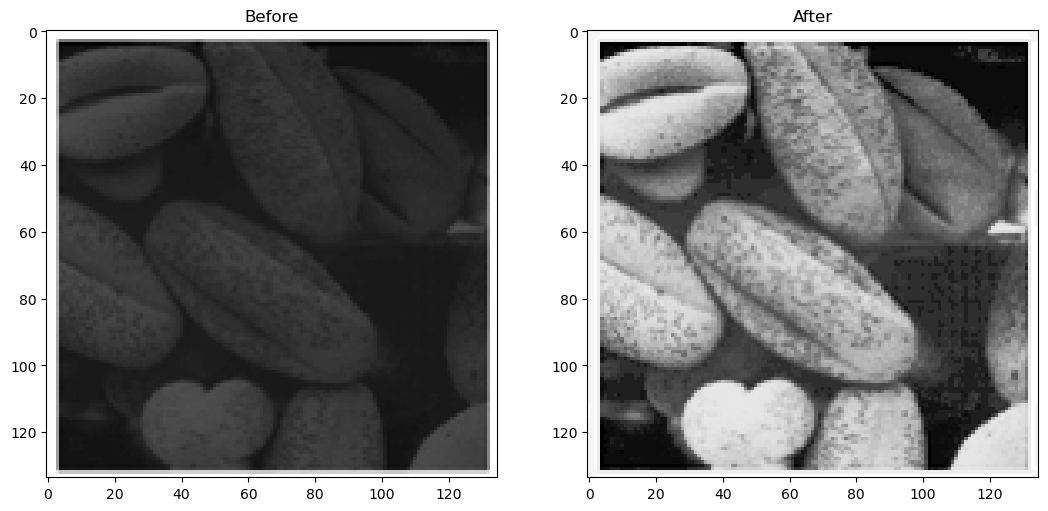

In [16]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist(name,ext,nbins=256):
    image = np.uint8(rgb2gray(io.imread(name + '.' + ext)[:,:,:3])*255)
    H = np.zeros(nbins)
    
    m, n = image.shape
    
    H = np.histogram(image, 256, [0,255])
    H_c = np.cumsum(H[0]) 
           
    q = 255*np.array(H_c)/(m*n)
    
    edited_image = np.zeros(image.shape)
    
    edited_image[:, :] = q[image[:, :]]
    show_images([image, edited_image], ['Before', 'After'])
getImageWithHist('imgs/Picture2', 'png')

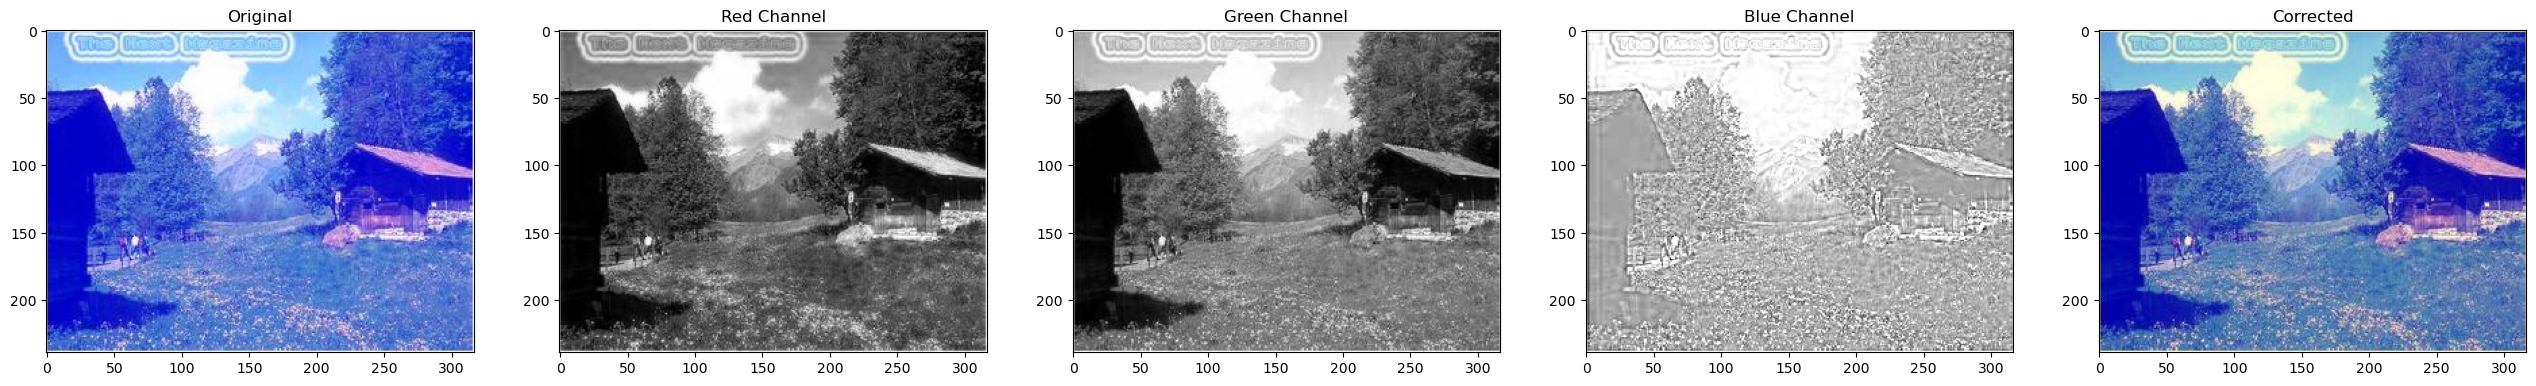

In [20]:
image = io.imread('imgs/2.jpg')

red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]
edited = image.copy()
edited[:,:,2] = edited[:,:,2]-30

show_images([image, red_channel, green_channel, blue_channel, edited], ['Original', 'Red Channel', 'Green Channel', 'Blue Channel', 'Corrected'])